# Main

In [1]:
#push!(LOAD_PATH, ".")
using RecommenderSystems, PyCall, Distributed, Plots, IJulia, Random

loadmat = pyimport("scipy.io")["loadmat"]
data = loadmat("ex8_movies.mat")
Y = convert(Array{Float64}, data["Y"]);

### Initialize workers

In [2]:
addprocs(3)
#@everywhere push!(LOAD_PATH, ".")
@everywhere workers() using RecommenderSystems;

### Destroy workers

In [ ]:
rmprocs(workers())

### fit! test

In [ ]:
model1 = SVDModel(100, SGD(nepochs=100, lr=0.013, reg=0.0))
ratings = [Rating(ci.I[1], ci.I[2], Y[ci]) for ci in findall(x->x>0, Y)]
shuffle!(ratings)
costs = Float64[]
@time fit!(model1, ratings, cb=(epoch, cost) -> begin
    IJulia.clear_output(true)
    println("Processed epoch #$(epoch): $(cost)")
    push!(costs, cost)
end)

plot(costs, xlabel="iterations", ylabel="cost", legend=false)

In [ ]:
score(model1, ratings)

### learningcurves test

In [ ]:
ratings = [Rating(ci.I[1], ci.I[2], Y[ci]) for ci in findall(x->x>0, Y)]
trainset, testset = splitcv(TrainTestSplit(0.9, shuffle=true), ratings);

In [ ]:
ratings = [Rating(ci.I[1], ci.I[2], Y[ci]) for ci in findall(x->x>0, Y)]
trainset, testset = splitcv(LeaveOneOut(shuffle=true), ratings);

In [ ]:
@time let model = SVDModel(100, SGD(nepochs=100, lr=0.01, reg=0.008))
    global sizes, trainscores, testscores = learningcurves(model, trainset, testset, 10000, cb=(index, total) -> begin
            IJulia.clear_output(true)
            println("Trained $(index)/$(total)")
            end)
end

plot(sizes, trainscores, xlabel="number of examples", ylabel="score", label="train score")
plot!(sizes, testscores, label="test score")

### ALS test

Processed epoch #20: 173.40407053425483
 88.755917 seconds (10.37 M allocations: 1.242 GiB, 0.83% gc time)


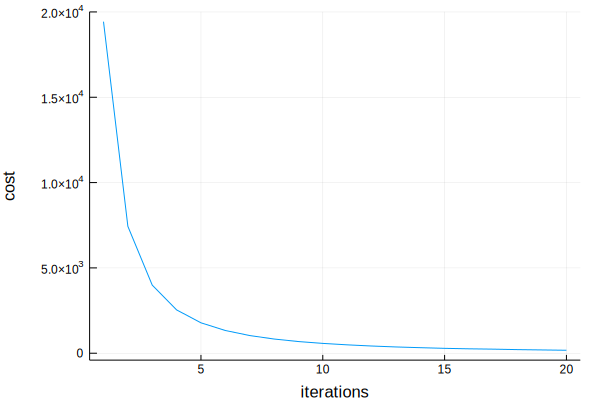

In [3]:
costs = Float64[]
model2 = SVDModel(100, ALS(nepochs=20, reg=0.0))
ratings = [Rating(ci.I[1], ci.I[2], Y[ci]) for ci in findall(x->x>0, Y)]
@time fit!(model2, ratings, cb=(epoch, cost) -> begin
        IJulia.clear_output(true)
        println("Processed epoch #$(epoch): $(cost)")
        push!(costs, cost)
        end)

plot(costs, xlabel="iterations", ylabel="cost", legend=false)

### Reminder

use `collect(enumerate` with `@distributed`!!!

### TODO

- Find out with score is more important in learning curves than in gradient descent graph !!!
- Implement ALS without biases, à la NETFLIX.
- Implement K-folds
- Validation curves function
- Random CV Search Function